In [31]:
!pip install typing langchain langgraph Ipython

In [32]:
from langgraph.graph import StateGraph
from typing import Dict ,TypedDict, Optional

In [33]:
class AgentState(TypedDict):
    name:set
    age:int
    final:Optional[str]


def first_step(state:AgentState)->AgentState:
    state['final'] = f'hello {state['name']} how are you?'

    return state

def second_step(state:AgentState) -> AgentState:

    state['final']=state['final']+f'you are {state['age']} years old'

    return state


In [34]:
graph = StateGraph(AgentState)

graph.add_node('first_step',first_step)
graph.add_node('second_step',second_step)

#this define an edge from where to where the flow will be
graph.add_edge('first_step','second_step')
graph.set_entry_point('first_step')
graph.set_finish_point('second_step')


app = graph.compile()

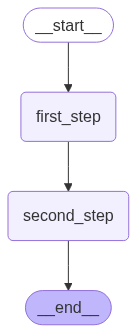

In [35]:
from IPython.display import display,Image

display(Image(app.get_graph().draw_mermaid_png()))

In [36]:
app.invoke({
    'name': 'John',
    'age': 30
    })


{'name': 'John',
 'age': 30,
 'final': 'hello John how are you?you are 30 years old'}